# This project is to look into the number of Helicopter Escapes from prison!
A challenge in this project is to not use pandas or numpy and ONLY rely on PYTHON NATIVE LISTS and DICT

## Here is a list of questions we are trying to answer.
1- In which year did the most attempts at breaking out of prison with a helicopter occur?
2- In which countries do the most attempted helicopter prison escapes occur?
3- In which countries do helicopter prison breaks have a higher chance of success?

In [7]:
from helper import *

## Get the Data
This data is off a wikipedia page!!
(https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [8]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import re

In [27]:
#define a function to import 
def data_from_url(url):
    data= pd.read_html(url)[1]
    data = data.to_numpy().tolist()
    return data

In [28]:
#print the first three rows
data = data_from_url(url)
for i in range(3):
    print(data[i])

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

In [29]:
#get rid of the last column (its a description usless to answer our question here)
index=0
for row in data:
    data[index] = row[:-1]
    index +=1
    
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


In [50]:
def fetch_year(date_string):
    return int(re.findall('\d{4}',date_string)[0]) #finds a sequence of 4 digits within a given entry (that being the year in the string)

In [36]:
#Replace the date with the year only
for row in data:
    row[0] = fetch_year(row[0])
#print the first couple of rows
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


In [46]:
#find the earliest year of prison break reported and the latest year
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

#make a list of all years in between the ealiest and latest prison escapes
years = []
for y in range(min_year, max_year + 1):
    years.append(y)

In [48]:
# find the number of attempted escapes per year
attempts_per_year=[]
index=0
for year in years:
    attempts_per_year.append([year,0])
    for attempt in data:
        if int(attempt[0]) == int(year):
            attempts_per_year[index][1]+=1
    index+=1
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


## Number of escape attempts per year

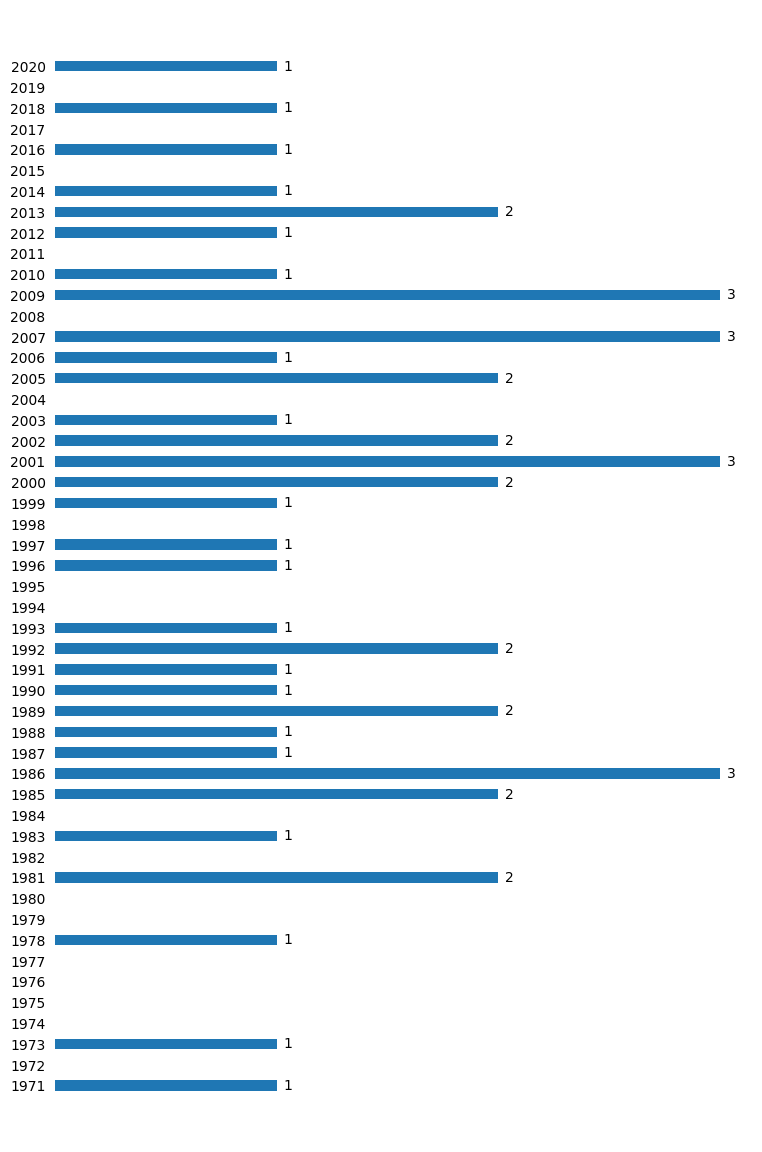

In [49]:
# Create a bar plot to visualize our results and ansswer the 1st Question
%matplotlib inline
barplot(attempts_per_year)

## Number of attempts per country

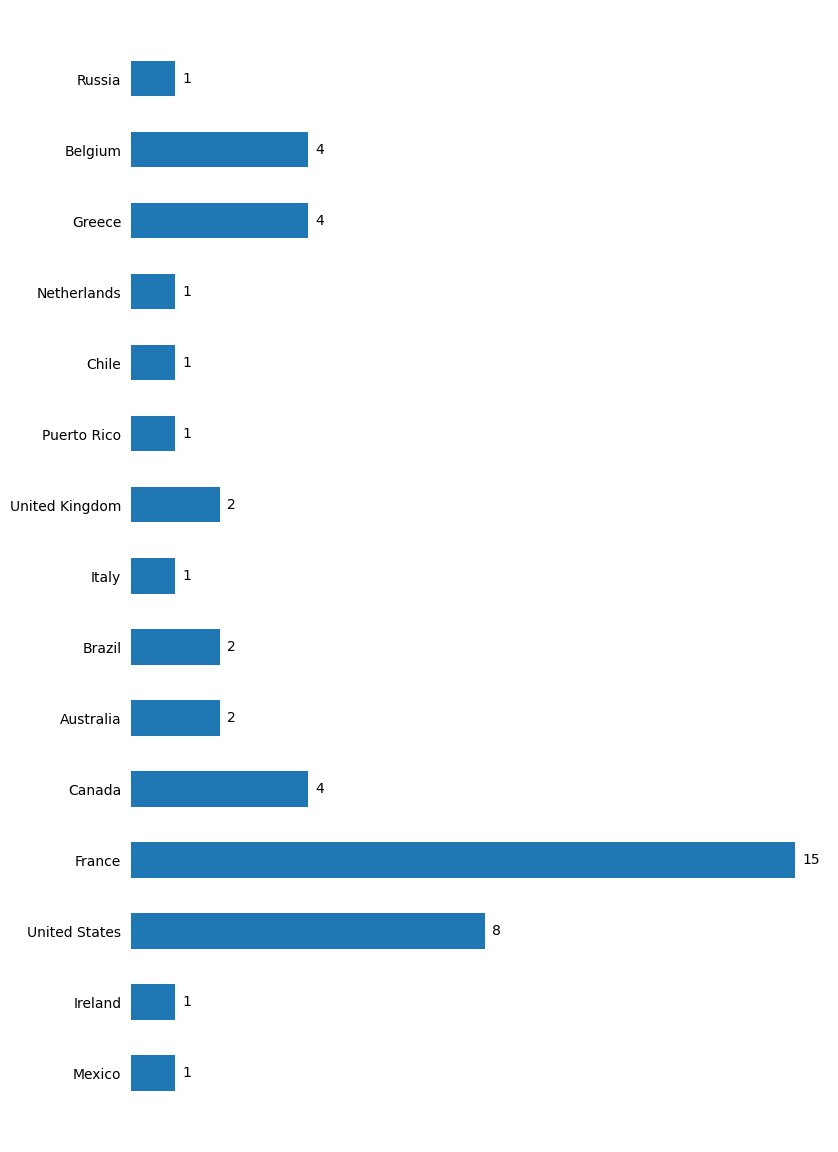

In [96]:
# Create a bar plot to visualize our results and ansswer the 2nd Question
barplot(attempts_per_country)

In [94]:
#count number of escapes per country
countries={}
for attempt in data:
    country = attempt[2]
    if country not in countries:
        countries[country]=1
    elif country in countries:
        count = countries[country]
        count +=1
        countries[country] = count

#convert dict to list for plotting
attempts_per_country=[]
for key,value in countries.items():
    attempts_per_country.append([key,value])
    
print(attempts_per_country)


[['Mexico', 1], ['Ireland', 1], ['United States', 8], ['France', 15], ['Canada', 4], ['Australia', 2], ['Brazil', 2], ['Italy', 1], ['United Kingdom', 2], ['Puerto Rico', 1], ['Chile', 1], ['Netherlands', 1], ['Greece', 4], ['Belgium', 4], ['Russia', 1]]


In [102]:
#count number of escapes per country
successfull_attempts={}
for attempt in data:
    country = attempt[2]
    if country not in successfull_attempts and attempt[3] =='Yes':
        successfull_attempts[country]=1
    elif country in successfull_attempts and attempt[3] =='Yes':
        count = successfull_attempts[country]
        count +=1
        successfull_attempts[country] = count
#calculate the number of successfull attempts as a percantage of total attempts
success_percentage_per_country=[]
for country in successfull_attempts.keys():
    total = countries[country]
    succesfull = successfull_attempts[country]
    percentage = round((succesfull/total)*100,2)
    success_percentage_per_country.append([country,percentage])
    
print(success_percentage_per_country)

[['Mexico', 100.0], ['Ireland', 100.0], ['France', 73.33], ['United States', 75.0], ['Brazil', 100.0], ['Italy', 100.0], ['United Kingdom', 50.0], ['Canada', 75.0], ['Puerto Rico', 100.0], ['Chile', 100.0], ['Australia', 50.0], ['Greece', 50.0], ['Belgium', 50.0], ['Russia', 100.0]]


## successful escape attempts as a percentage of total attempts

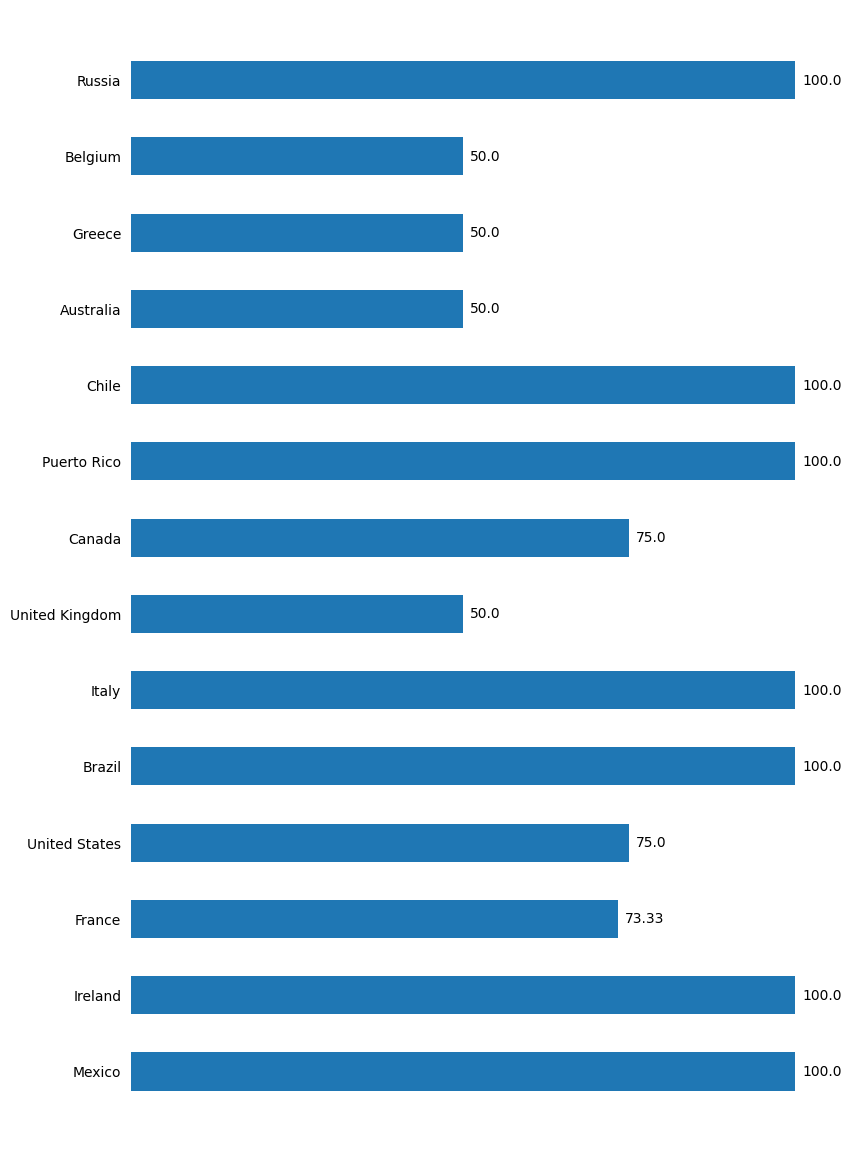

In [105]:
# Create a bar plot to visualize our results and ansswer the 3rd Question
barplot(success_percentage_per_country)